<a href="https://colab.research.google.com/github/ka1901/ML_Project/blob/master/Marketing_Campaign_for_Banking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Marketing Campaign for Banking Products**

We have data for the customers of the bank. Our aim is to build a modlel to help the bank to identify the potential customers who have higher probability of purchasing the loan.


**1. Importing the required libraries for EDA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Bank.csv to Bank (3).csv


**1.1 Loading the data into the data frame.**
**bold text**

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Bank.csv'])) 


In [ ]:
#To display top 5 rows.
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**1.2 Checking the types of data and basic summary stats**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#To display how many null values are present in each column.
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#To display summary stats
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We now know that:
1. Our data has 5000 row and 14 attributes.
2. Our data is clean i.e. no null values present in the data.
3. Our data is numeric in nature
4. Experience can not be negative but our table is showing it. So we have to clean this attribute.



Lets check that wheather age and experience are correlated.

In [ ]:
df['Experience'].corr(df['Age'])

0.9942148569683321

In [ ]:
corr = df.corr(method = 'pearson')
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802



We can see that these columns are highly correlated so we can use only one column. Lets take the age column only.

**2. Dropping irrelevant columns.**

The id of a person will not help our model to reach a conclusion. So we will drop id column. Also, the experience is highly correlated to age so we will also drop experience column.

In [ ]:
df = df.drop(['ID','Experience'],axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#To check if rows has duplicate values
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows ", duplicate_rows_df)

Number of duplicate rows  Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [ ]:
#To delete the rows which has NAN ormissin data in data frame.
df = df.dropna()
df.count()


Age                   5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [ ]:
#To print the number of rows which has invalid or missing data.
print(df.isnull().sum())

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


**3.  Study the data distribution in each attribute and target variable**


3.1 Number of unique in each column


In [ ]:
df.nunique(axis=0)

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

3.2 Value counts of all categorical columns

In [ ]:
categorical_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']

for column in categorical_columns:
    print(f'Value counts for {column} column:')
    print(df[column].value_counts())
    print()

Value counts for Family column:
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Value counts for Education column:
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Value counts for Securities Account column:
0    4478
1     522
Name: Securities Account, dtype: int64

Value counts for CD Account column:
0    4698
1     302
Name: CD Account, dtype: int64

Value counts for Online column:
1    2984
0    2016
Name: Online, dtype: int64

Value counts for CreditCard column:
0    3530
1    1470
Name: CreditCard, dtype: int64

Value counts for Personal Loan column:
0    4520
1     480
Name: Personal Loan, dtype: int64



Lets try to plot these data and get more clear insights.    

Lets see about the families first.

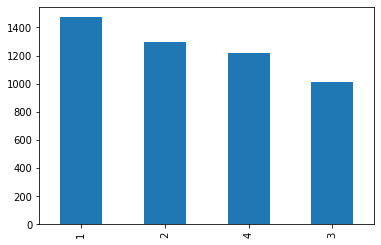

In [ ]:
df['Family'].value_counts().plot(kind = 'bar')

We can conclude about family size of the customers from here. Most of the customers are single.

Lets now check the education status of the customers.

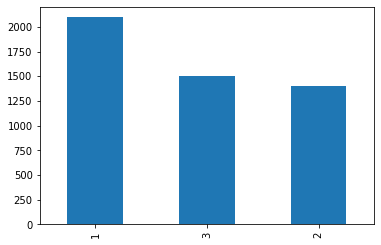

In [ ]:
df['Education'].value_counts().plot(kind = 'bar')

It seems 2096 of the customers are undergraduate. After this, professionals(1501) are more than graduate(1403).

Lets check about Pesronal Loan of previous year.

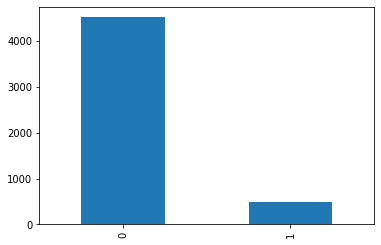

In [ ]:
df['Personal Loan'].value_counts().plot(kind = 'bar')

It seems very few people have taken pesonal loan previous year. Only 480 people from 5000 has acquired the loan. That is only 9.6% of total customers took the loan.
This is the percentage which we are trying to increase.

Lets check how many customers are having certificate of deposit account with the bank.

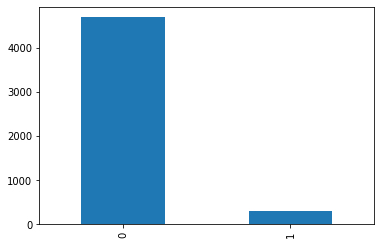

In [ ]:
df['CD Account'].value_counts().plot(kind = 'bar')

It also seems pretty low. Only 302 people from 5000 peope have this account. it is only 6.04% of the total customers.

Lets check how many customers are having security accounts in the bank.

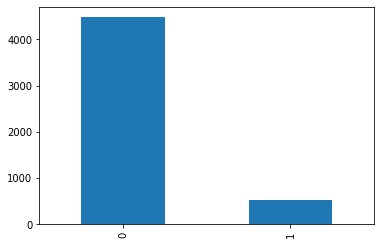

In [ ]:
df['Securities Account'].value_counts().plot(kind = 'bar')

Only 522 people are having Security account in the bank. That is only 10.4% of total customers are having this account.



In [ ]:
522/5000

0.1044

3.3 Lets check how many customers are usiing the online facilities and credit card facilities.



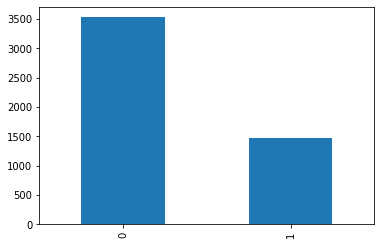

In [ ]:
df['CreditCard'].value_counts().plot(kind = 'bar')

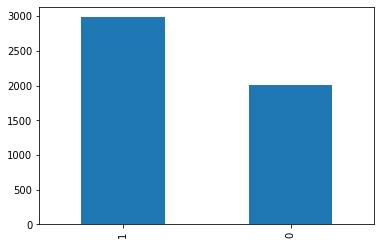

In [ ]:
df['Online'].value_counts().plot(kind = 'bar')



It seems many people are using online facilities provided by bank but only few are using credit cards. Around 59% people are using online facilities provided by the bank and 29% peole are using the credit card facilties.

We can drop the zipcode column as it may not affect the personal loan of people.

In [ ]:
df = df.drop('ZIP Code',axis = 1)


In [ ]:
df

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


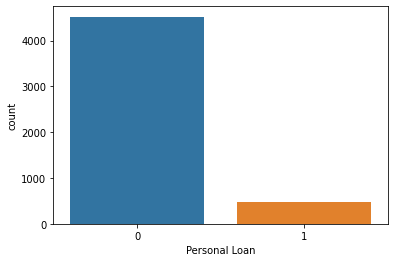

In [ ]:
sns.countplot(df['Personal Loan'])

CCAvg is the monthly amount spend by the customer from credit card. Lets find out how many people are not using the card.



In [ ]:
sum(df['CCAvg']==0)


106

Its pretty obvious that out of 108 users of credit card, only single person is not spending from credit card.

3.4 Lets try to find out house mortgage values of people.

In [ ]:
sum(df['Mortgage']==0)

3462

So around 3462 customers has house mortgage value o be zero



3.5 Univariate Analysis

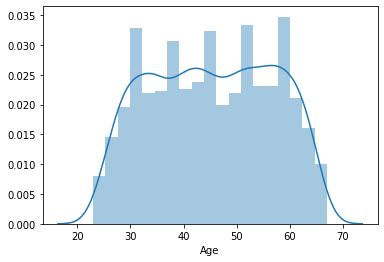

In [ ]:
sns.distplot(df.Age)
##Age has a symmetric distribution.

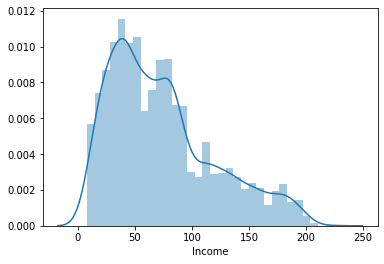

In [ ]:
sns.distplot(df.Income)
##Income has a right skewed distribution

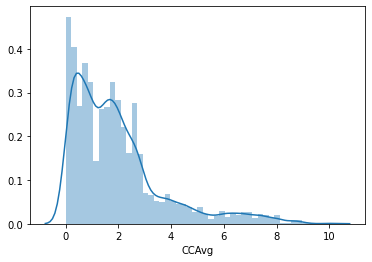

In [ ]:
sns.distplot(df.CCAvg)

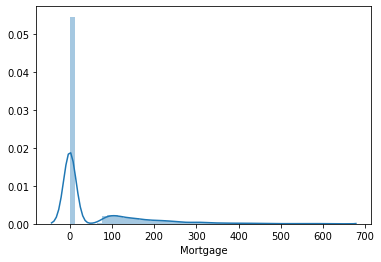

In [ ]:
sns.distplot(df.Mortgage)


We can see that CCavg and income are not narmalized so we have to normalize these variables firest vefore using them in our model.Also we don't need to use zip code.



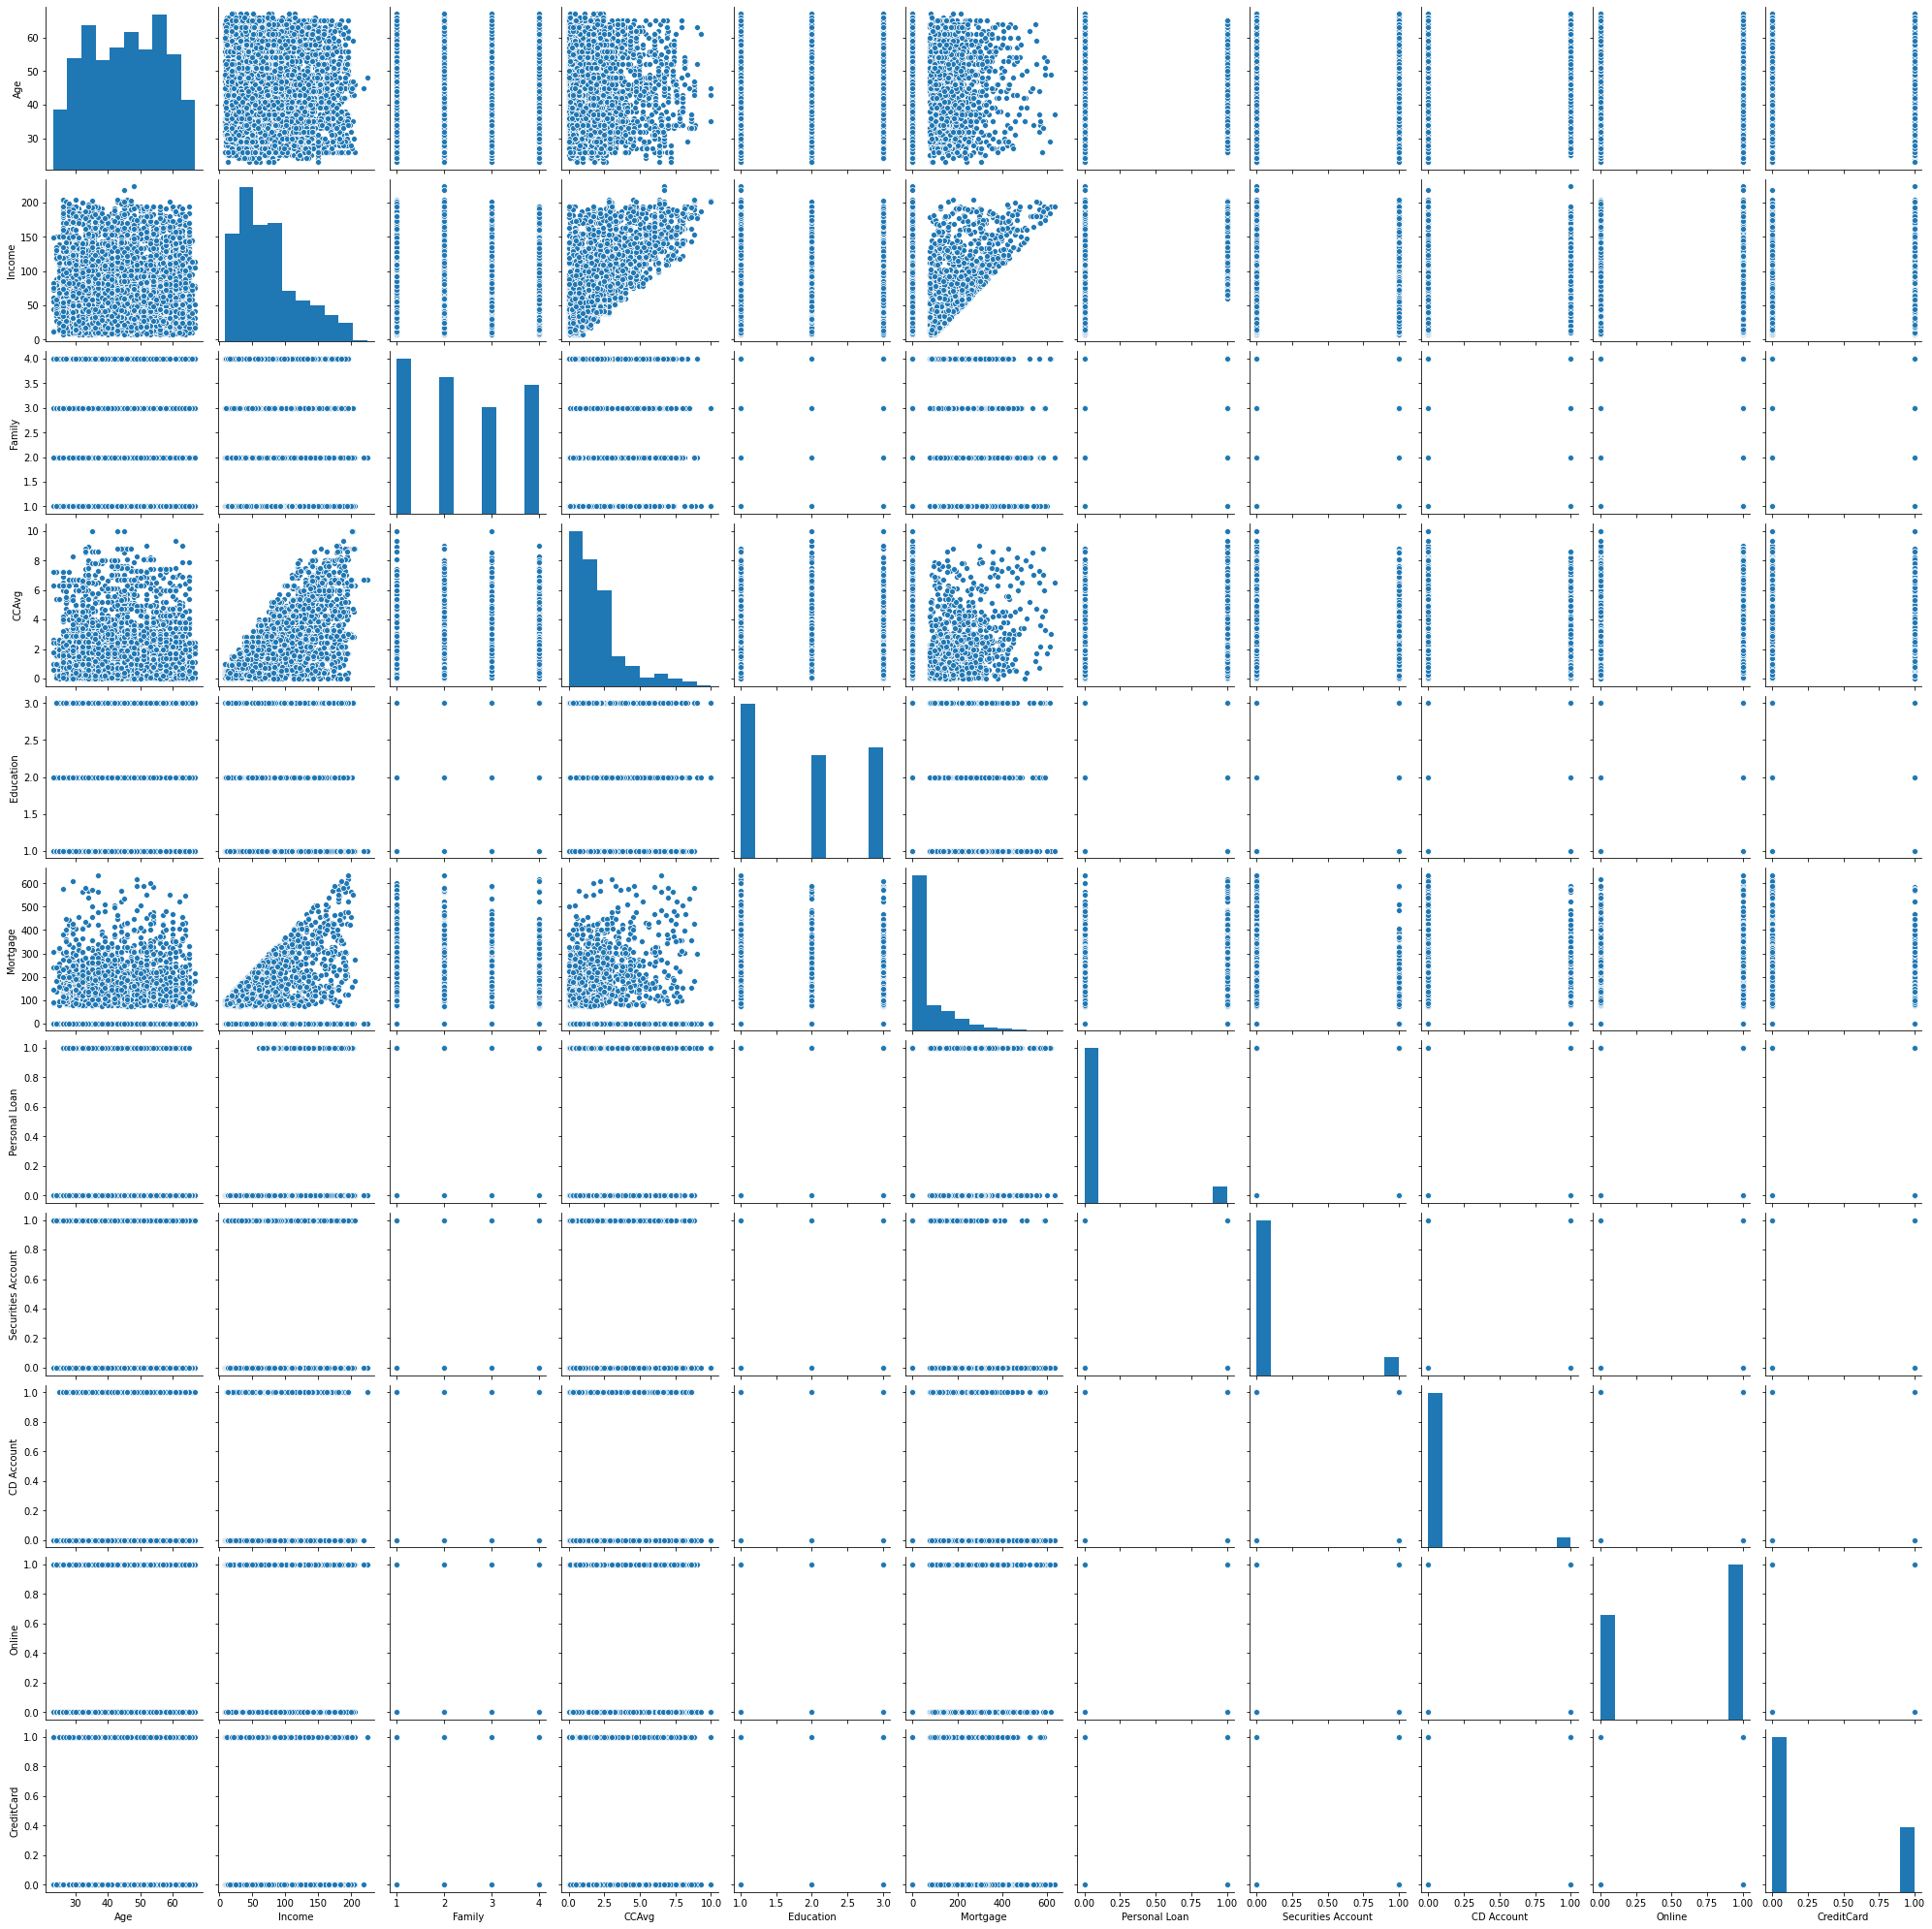

In [ ]:
sns.pairplot(df)


3.5 Multivariate Analysis

Text(0, 0.5, 'education')

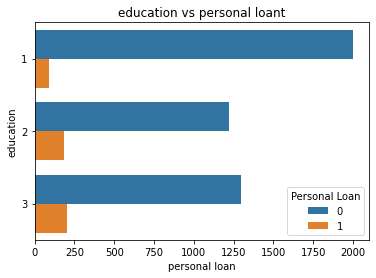

In [ ]:
sns.countplot(y = 'Education', data = df, hue = 'Personal Loan')
plt.title('education vs personal loant')
plt.xlabel('personal loan')
plt.ylabel('education')

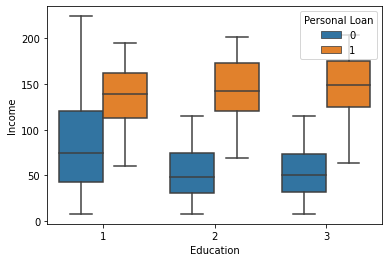

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

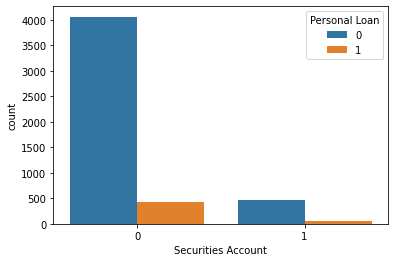

In [ ]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

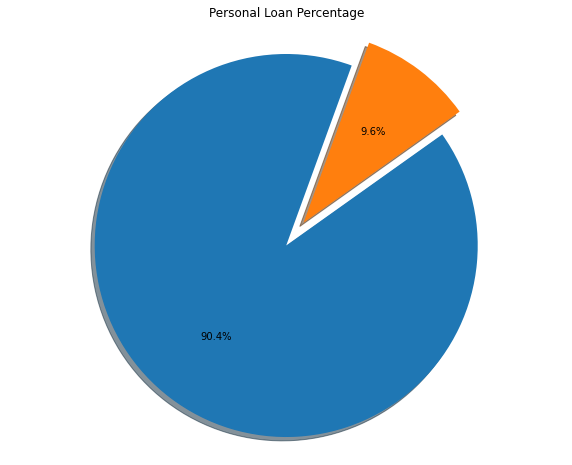

In [ ]:
DF=pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

9.6% get approved for personal loans.

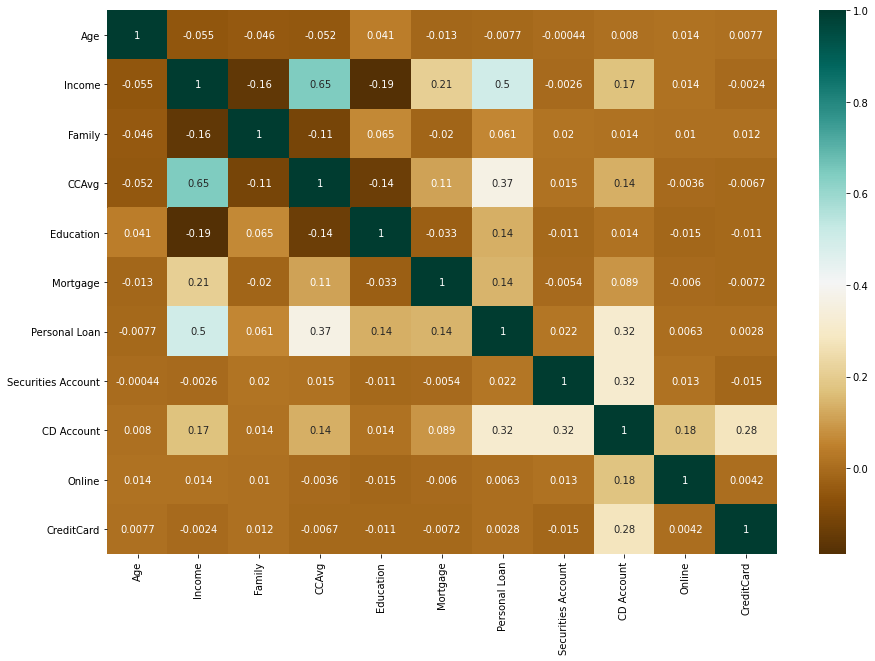

In [ ]:
 plt.figure(figsize=(15,10))
c = df.corr()
sns.heatmap(c,cmap = "BrBG",annot = True)

So lets use x featurs for our model and personal loan as y feature.

In [ ]:
x = df[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account']]
y = df['Personal Loan'].values


We will add Income and CCAvg in our features after scaling them. WE are scaling them below.



**4. FEATURE SCALING AND TRANSFORMATION**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
    
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.189815,1.000000,0.16,0.0,0.0,0,1,0,0,0
1,0.500000,0.120370,0.666667,0.15,0.0,0.0,0,1,0,0,0
2,0.363636,0.013889,0.000000,0.10,0.0,0.0,0,0,0,0,0
3,0.272727,0.425926,0.000000,0.27,0.5,0.0,0,0,0,0,0
4,0.272727,0.171296,1.000000,0.10,0.5,0.0,0,0,0,0,1


In [ ]:
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan'].values

X.shape, y.shape

((5000, 10), (5000,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y,random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 10), (1500, 10), (3500,), (1500,))

In [ ]:
class_names = ['wont take loan', 'take loan']

We have found out that we have income and ccavg value skewed so we have to transform them.

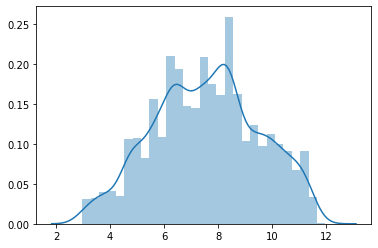

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['Income'].values.reshape(-1,1))
sns.distplot(pt.transform(x['Income'].values.reshape(-1,1)))


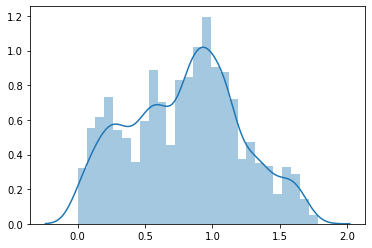

In [ ]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['CCAvg'].values.reshape(-1,1))
sns.distplot(pt.transform(x['CCAvg'].values.reshape(-1,1)))

Now, ccavg and income are transformed. But now we have to transform the mortgage column. We have found that many values are 0 and other are only few.



In [ ]:
x['MortgageN'] = pd.cut(x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
x.drop('Mortgage',axis=1,inplace=True)

**5. TRAINING AND TESTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0,stratify = y)
scx.fit_transform(x_train)
scx.transform(x_test)
#scy.fit_transform(y_train.reshape(-1,1))
#scy.transform(y_test.reshape(-1,1))

array([[-0.97265109,  2.31851937, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ...,  2.97177736,
        -0.24878345, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ...,  2.97177736,
        -0.24878345, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -0.33649896,
        -0.24878345,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  2.97177736,
        -0.24878345, -0.47490853]])

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
log_reg = LogisticRegression(C=1.0, max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

Logistic Regression Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.86
Recall: 0.55


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

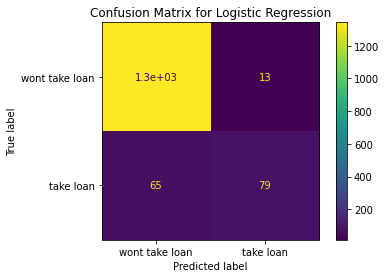

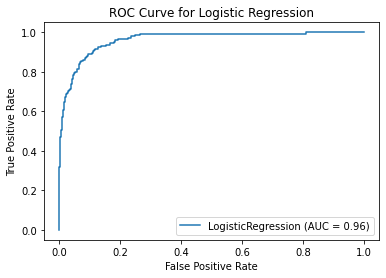

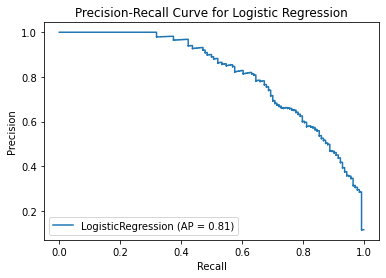

In [ ]:
print('Logistic Regression Results: ')

train_score = log_reg.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = log_reg.predict(X_test)

precision_logi = precision_score(y_test, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

So we can see that accuracy score for ur test data is 95%. But we can see in confusion matrix that that false negative are very much that is 40%.
Now let us try and check the accuracy with the other models as well.

RANDOM FOREST CLASSIFIER


Random forest is an ensemble machine learning algorithm.

It is perhaps the most popular and widely used machine learning algorithm given its good or excellent performance across a wide range of classification and regression predictive modeling problems.

It works in four steps:

1)Select random samples from a given dataset.

2)Construct a decision tree for each sample and get a prediction result from each decision tree.

3)Perform a vote for each predicted result.

4)Select the prediction result with the most votes as the final prediction.

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Random Forest Classifier Results: 
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.97
Recall: 0.84


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

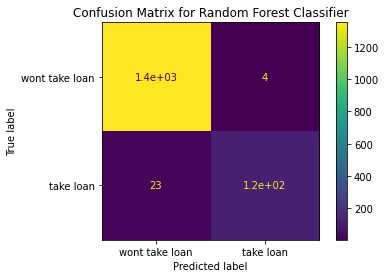

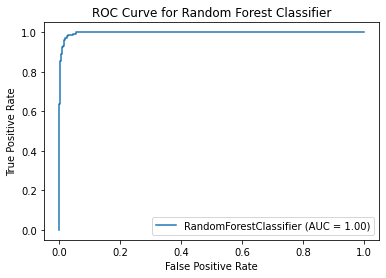

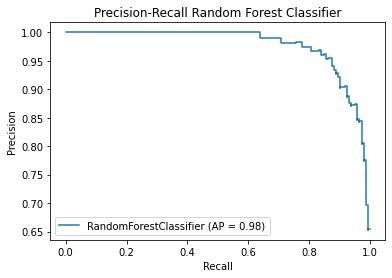

In [ ]:
print('Random Forest Classifier Results: ')

train_score = rf_clf.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = rf_clf.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(y_test, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rf_clf, X_test, y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rf_clf, X_test, y_test)
plt.title('Precision-Recall Random Forest Classifier')

It is clearly showing that the model of random forest is working very good. The accuracy score is 98% for test data which is highest in all the algorithm we have used till now. Also the confusion matrix is also better than the previous results.

**DECISION TREE:**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account'],filled=True, rounded=True) 
graph = graphviz.Source(dot_data)

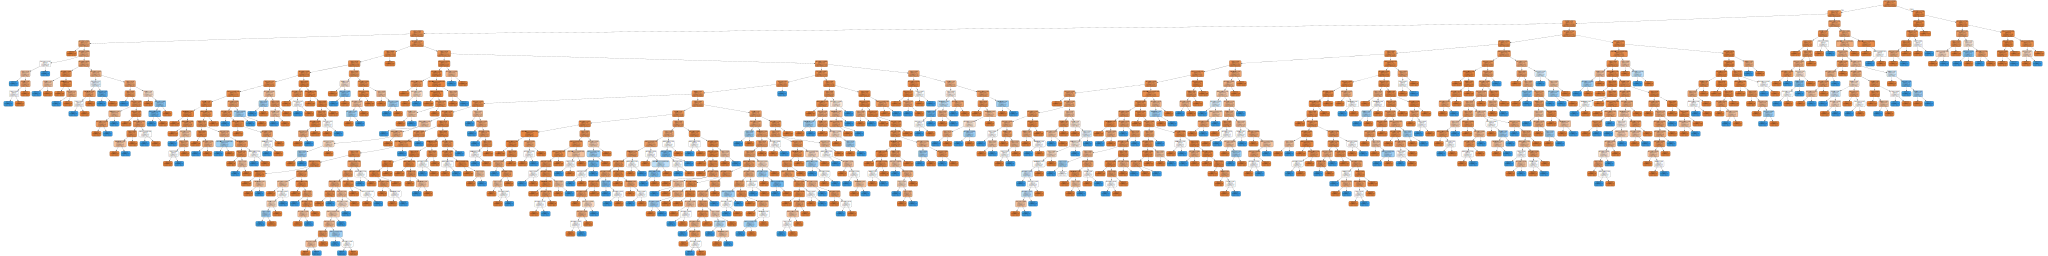

In [ ]:
graph

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.18733333333333332
R2 score: -1.158616027531957
Accuracy score for test data 0.8126666666666666


In [ ]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.8428571428571429


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1203  153]
 [ 128   16]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1356
           1       0.09      0.11      0.10       144

    accuracy                           0.81      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.83      0.81      0.82      1500



It is working very much better than other two algo. It is showing 97% accuracy score. Apart from this, we can even find that the false negative and false positive are also very less as compared to above to models.

***CONCLUSION***


In the first step of this project we imported various libraries and our data. Than we found out various things about our data.

1. We have to make the model to predict whether a person will take personal loan or not.
2. We found that age and experience are highly correlated so we droped the experience column.
3. ID and ZIPcode were not contributing factors for a person to take loan so we dropped them. 
4. The Income and CCAvg column were left skewed so we applied Power transformation to them to normalize them.
5.  The mortgage column was also skewed but since it was discrete so rather than power transformation, we use binning technique.

After this we used several models to make predictions.

+++++++++++++++++++++++++++ **RANDOM FOREST** ++++++++++++++++++++++++++

ACCURACY SCORE: 98.46%

CONFUSION MATRIX: [[1353 3][ 20 124]]

+++++++++++++++++++++++++++ **DECISION TREE** +++++++++++++++++++++++++++

ACCURACY SCORE: 97.9%

CONFUSION MATRIX: [[1339 17][ 14 130]]

+++++++++++++++++++++++++++ **LOGISTIC REGRESSION** +++++++++++++++++++++

ACCURACY SCORE: 94.94%

CONFUSION MATRIX: [[1338 18][ 59 85]]

**We get best results from the Random Forest Classifier.**